**Module Path**

In [1]:
import os

os.chdir("./../../")

**Device**

In [2]:
from utils import get_device

device = get_device()

# Policy Gradient Method


# Derivation

If To derive the equation that we use to approximate the gradient, please read the text below.

$$
\nabla_{\theta} J(\theta) = \sum_{i=1}^{N} \nabla_{\theta} \log \pi_{\theta} (a^{(i)} | s^{(i)}) R^{(i)}
$$

---

## Likelihood Ratio Policy Gradient

We'll begin by exploring how to calculate the gradient $ \nabla_{\theta} J\theta $. The calculation proceeds as follows:

$$
\nabla_{\theta} J(\theta) = \nabla_{\theta} \sum_{i} P_{\theta} (i) R(i) \tag{1}
$$

$$
= \sum_{i} \nabla_{\theta} P_{\theta} (i) R(i) \tag{2}
$$

$$
= \sum_{i} P_{\theta} (i) \frac{\nabla_{\theta} P_{\theta} (i)}{P_{\theta} (i)} R(i) \tag{3}
$$

$$
= \sum_{i} P_{\theta} (i) \nabla_{\theta} \log P_{\theta} (i) R(i) \tag{4}
$$

$$
= \mathbb{E}_{P_{\theta} (i)} \left[ \nabla_{\theta} \log P_{\theta} (i) R(i) \right] \tag{5}
$$

First, we note line $1$ follows directly from $ J(\theta) = \sum_{i} P_{\theta} (i) R(i) $, where we only take the gradient of both sides.

Then, we can get line $2$ by just noticing that we can rewrite the gradient of the sum as the sum of the gradients.

In line $3$, we only multiply every term in the sum by $ P_{\theta} (i) $, which is perfectly allowed because this fraction is equal to one!

Next, line $4$ is just a simple rearrangement of the terms from the previous line. That is,

$$
P_{\theta} (i) \frac{\nabla_{\theta} P_{\theta} (i)}{P_{\theta} (i)} = P_{\theta} (i) \nabla_{\theta} \log P_{\theta} (i)
$$

Finally, line $5$ follows from the chain rule, and the fact that the gradient of the log of a function is always equal to the gradient of the function divided by the function (in case it helps to see this with simpler notation, recall that $ f(x) = \log g(x)$ implies $ \nabla_{x} f(x) = \frac{\nabla_{x} g(x)}{g(x)} $). Thus,

$$
\nabla_{\theta} \log P_{\theta} (i) = \frac{\nabla_{\theta} P_{\theta} (i)}{P_{\theta} (i)}
$$

The final “trick” that slides in line $5$, i.e. \$ \nabla_{\theta} \log P_{\theta} (i) = \frac{\nabla_{\theta} P_{\theta} (i)}{P_{\theta} (i)} \$, is referred to as the likelihood ratio trick or REINFORCE trick.

Likewise, it is common to refer to the gradient as the likelihood ratio policy gradient:

$$
\nabla_{\theta} J(\theta) = \sum_{i} \nabla_{\theta} \log P_{\theta} (i) R(i)
$$

Once we've written the gradient as an expected value in this way, it becomes much easier to estimate.

---

## Sample-Based Estimate

We can approximate the likelihood ratio policy gradient with a sample-based average, as shown below:

$$
\nabla_{\theta} J(\theta) \approx \frac{1}{N} \sum_{i=1}^{N} \nabla_{\theta} \log \pi_{\theta} (a^{(i)} | s^{(i)}) R^{(i)}
$$

where each \$ R^{(i)} \$ is a sampled trajectory.

---

## Finishing the Calculation

Before calculating the expression above, we will need to further simplify \$ \nabla_{\theta} \log P_{\theta} (i) \$. The derivation proceeds as follows:

$$
\nabla_{\theta} \log P_{\theta} (i) = \nabla_{\theta} \log \left[ \prod_{t=0}^{T} \pi_{\theta} (a_{t}^{(i)} | s_{t}^{(i)}) \right] \tag{1}
$$

$$
= \sum_{t=0}^{T} \nabla_{\theta} \log \pi_{\theta} (a_{t}^{(i)} | s_{t}^{(i)}) \tag{2}
$$

$$
= \sum_{t=0}^{T} \nabla_{\theta} \log \pi_{\theta} (a_{t}^{(i)} | s_{t}^{(i)}) + \sum_{t=0}^{T} \nabla_{\theta} \log P (s_{t+1}^{(i)} | s_{t}^{(i)}, a_{t}^{(i)}) \tag{3}
$$

$$
= \sum_{t=0}^{T} \nabla_{\theta} \log \pi_{\theta} (a_{t}^{(i)} | s_{t}^{(i)}) \tag{4}
$$

$$
= \sum_{t=0}^{T} \nabla_{\theta} \log \pi_{\theta} (a_{t}^{(i)} | s_{t}^{(i)}) \tag{5}
$$

First, line $1$ shows how to calculate the probability of an arbitrary trajectory $\tau^{(i)}$. Namely, $P_{\theta} (i) = \prod_{t=0}^{T} \pi_{\theta} a_{t}^{(i)} | s_{t}^{(i)} P s_{t+1}^{(i)} | s_{t}^{(i)}, a_{t}^{(i)}$, where we have to take into account the action-selection probabilities from the policy and the state transition dynamics of the MDP.

Then, line $2$ follows from the fact that the log of a product is equal to the sum of the logs.

Then, line $3$ follows because the gradient of the sum can be written as the sum of gradients.

Next, line $4$ holds, because $\sum_{t=0}^{T} \nabla_{\theta} \log P s_{t+1}^{(i)} | s_{t}^{(i)}, a_{t}^{(i)}$ has no dependence on $\theta $, so $\nabla_{\theta} \sum_{t=0}^{T} \log P s_{t+1}^{(i)} | s_{t}^{(i)}, a_{t}^{(i)} = 0$.

Finally, line $5$ holds, because we can rewrite the gradient of the sum as the sum of gradients.

---

## That's it!

Plugging in the calculation above yields the equation for estimating the gradient:

$$
\nabla_{\theta} J(\theta) \approx \frac{1}{N} \sum_{i=1}^{N} \sum_{t=0}^{T} \nabla_{\theta} \log \pi_{\theta} (a_{t}^{(i)} | s_{t}^{(i)}) R^{(i)}
$$


---

## Explore CartPole

We begin by importing the necessary packages.

In [3]:
import numpy as np
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline
plt.style.use("ggplot")
np.set_printoptions(precision=3, linewidth=120)

is_ipython = "inline" in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [4]:
from env import Gym
from policy import RandomPolicy

Use the code cell below to create an instance of the [CartPole](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py) environment.

In [5]:
import torch

seed = 101

np.random.seed(seed)
torch.manual_seed(seed)
env = Gym("cartpole")

Let's watch a random agent dealing with the environment

Score:  12.0


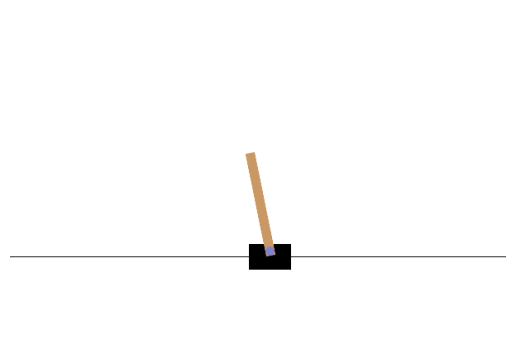

In [6]:
env.watch(RandomPolicy(env.get_action_space()), display)

In [7]:
print(env.get_observation_space())
print(env.get_action_space())

Box([-4.800e+00 -3.403e+38 -4.189e-01 -3.403e+38], [4.800e+00 3.403e+38 4.189e-01 3.403e+38], (4,), float32)
Discrete(2)


In [8]:
from model import FCBody
import torch.nn as nn

h_activation = nn.ReLU()
a_activation = nn.Softmax(dim=-1)

state_size = len(env.get_observation_space().sample())
hidden_size = 16
action_size = env.get_action_space().n


model = FCBody(
    s_size=state_size,
    a_size=action_size,
    h_size=hidden_size,
    h_activation=h_activation,
    a_activation=a_activation,
).to(device)

In [9]:
from policy import ReinforcePolicy

policy = ReinforcePolicy(model=model, device=device)

## Train

In [10]:
import torch.optim as optim
from train import ReinforceTrainer
from torch.optim.lr_scheduler import StepLR

max_steps_per_episode = 1000
gamma = 0.99
print_every = 100
target_score = 195.0
n_episodes = 10_000

lr = 1e-2
lr_decay_step_size = 500
lr_decay = 0.99

optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=lr_decay_step_size, gamma=lr_decay)

trainer = ReinforceTrainer(
    policy,
    env,
    optimizer,
    scheduler=scheduler,
    max_steps_per_episode=max_steps_per_episode,
    gamma=gamma,
    target_score=target_score,
    print_every=print_every,
)

In [11]:
scores = trainer.train(n_episodes, future_rewards_only=True, normalize_rewards=False)

Episode 100	Average Score: 37.80	Learning Rate: 0.010000


Episode 200	Average Score: 34.23	Learning Rate: 0.010000


Episode 300	Average Score: 57.04	Learning Rate: 0.010000


Episode 400	Average Score: 88.75	Learning Rate: 0.010000


Episode 500	Average Score: 67.57	Learning Rate: 0.009900


Episode 600	Average Score: 54.01	Learning Rate: 0.009900


Episode 700	Average Score: 84.47	Learning Rate: 0.009900


Episode 800	Average Score: 79.02	Learning Rate: 0.009900


Episode 900	Average Score: 125.27	Learning Rate: 0.009900


Episode 1000	Average Score: 116.33	Learning Rate: 0.009801


Episode 1100	Average Score: 54.71	Learning Rate: 0.009801


Episode 1200	Average Score: 72.88	Learning Rate: 0.009801


Environment solved in 1266 episodes!	Average Score: 203.65


In [12]:
trainer.evaluate(50)

Evaluation: Average reward over 50 episodes: 1000.00


1000.0

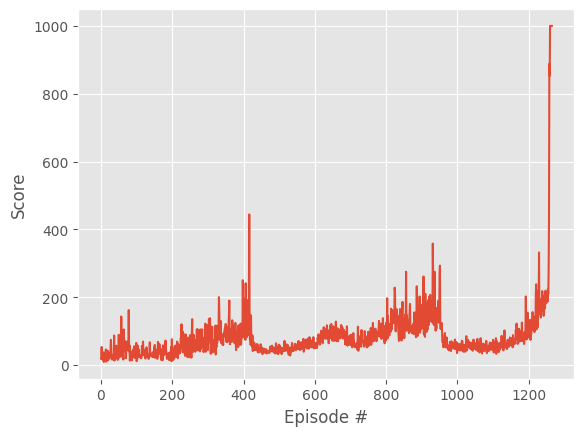

In [13]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel("Score")
plt.xlabel("Episode #")
plt.show()

## Watch a Smart Agent!

Score:  1000.0


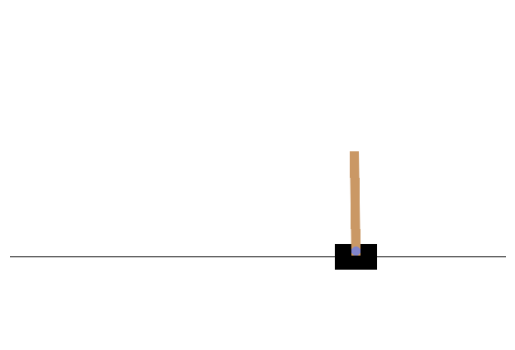

In [14]:
env.watch(policy, display)

## Save the agent

In [15]:
import torch

# Define the path where you want to save the model
model_path = "./checkpoints/reinforce_policy_cartpole.pth"

# Save the model's state dictionary
torch.save(model.state_dict(), model_path)